In [1]:
import scipy.stats as stats
import numpy as np

from scipy.stats import binom

import matplotlib.pyplot as plt

In [34]:
# Given data
data = [700, 650, 800, 975, 855, 785, 759, 640, 950, 715, 825, 980, 895, 1025, 850, 915, 740, 985, 770, 785, 700, 925]

target = 700
alpha  = 0.05

**Null Hypothesis (H0):**  
The median of the data is equal to the target value of 700.

**Alternate Hypothesis (H1):**  
The median of the data is not equal to the target value of 700.

In [35]:
print([x > target for x in data])

[False, False, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, False, True]


In [36]:
# Step 1: Compute t-statistic
greater_count = sum(x > target for x in data)
less_count    = sum(x < target for x in data)

greater_count, less_count

(18, 2)

This counts the number of values greater than and less than the target value, then selects the smaller of the two counts.

In [37]:
t_statistic = min(greater_count, less_count)
t_statistic

2

In [46]:
# Filter out data points equal to the target value
filtered_data = [x for x in data if x != target]

# Number of data points after filtering
n = len(filtered_data)

In [47]:
# Parameters for the binomial distribution
p = 0.5  # Probability of success

In [48]:
# Range of x values (number of successes)
x = np.arange(0, n+1)

In [49]:
# Binomial distribution
binom_dist = binom.pmf(x, n, p)

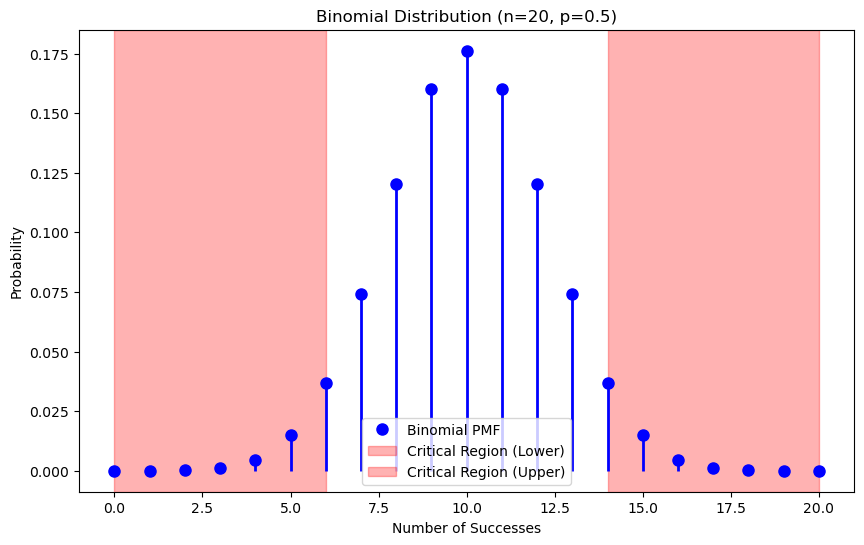

In [50]:
# Critical values
critical_value_lower = stats.binom.ppf(alpha/2, n, p)
critical_value_upper = stats.binom.ppf(1 - alpha/2, n, p)

# Plotting the binomial distribution
plt.figure(figsize=(10, 6))
plt.plot(x, binom_dist, 'bo', ms=8, label='Binomial PMF')
plt.vlines(x, 0, binom_dist, colors='b', lw=2)

# Highlighting critical regions
plt.axvspan(0, critical_value_lower, color='red', alpha=0.3, label='Critical Region (Lower)')
plt.axvspan(critical_value_upper, n, color='red', alpha=0.3, label='Critical Region (Upper)')

# Adding labels and legend
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n={}, p={})'.format(n, p))
plt.legend()

# Show plot
plt.show()

In [51]:
# Compute p-value
p_value = 2 * stats.binom.cdf(t_statistic, n, 0.5)  # Two-tailed p-value
p_value

0.0004024505615234375

This computes the p-value by finding the cumulative probability up to the test statistic and doubling it (for a two-tailed test).

In [44]:
# Conclusion
reject_null = p_value < alpha  # Determine whether to reject the null hypothesis

In [45]:
reject_null

True